### Desafío 3: Elaboración de un modelo de clasificación
#### Etapa 1 - Limpieza de la base de datos del personal de Ciencia y Tecnología

El personal de CyT en una unidad estadística incluye a todas las personas involucradas directamente en I+D así como a aquellas que brindan servicios directos para las actividades de I + D (como gerentes de I + D, administradores, técnicos y personal de oficina). 

Pasos a seguir en la limpieza:
    1. Lectura e interpretación de la tabla
    2. Unión de la tabla original con las tablas de referencias
    3. Se transforman los datos de las produccciones de los últimos años
    4. Se lleva la edad a rangos de edades
    5. Se eliminan columnas que no se usarán
    6. Análisis de NaN y valores erróneos
    7. Análisis exploratorio más profundo

#### 1. Lectura e interpretación de la tabla

In [8]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Se lee la tabla
df=pd.read_csv('personas_2017.csv',sep=";")
#Se guarda la tabla original por si se necesita posteriormente
df_original=df

In [11]:
df.head()

,persona_id,anio,sexo_id,edad,maximo_grado_academico_id,disciplina_maximo_grado_academico_id,disciplina_titulo_grado_id,disciplina_experticia_id,tipo_personal_id,producciones_ult_anio,...,producciones_ult_3_anios,producciones_ult_4_anios,institucion_trabajo_id,seniority_level,categoria_conicet_id,categoria_incentivos,max_dedicacion_horaria_docente_id,institucion_cargo_docente_id,clase_cargo_docente_id,tipo_condicion_docente_id
0,1,2017,2,42,-1,-1,-1,64,1,0,...,0,1,4488,D,11.0,-1.0,3.0,116.0,22.0,1.0
1,5,2017,1,54,1,255,255,255,3,1,...,6,8,118,B,3.0,3.0,3.0,118.0,17.0,2.0
2,7,2017,2,36,1,158,111,158,3,9,...,16,20,587,C,1.0,-1.0,2.0,3507.0,20.0,2.0
3,9,2017,2,67,1,256,256,157,3,0,...,0,6,5191,B,NaN,NaN,NaN,NaN,NaN,NaN
4,10,2017,2,57,5,248,248,29,3,4,...,6,9,44,C,-1.0,4.0,3.0,101.0,21.0,1.0


In [12]:
df.shape

(66685, 21)

In [13]:
df.columns

Index(['persona_id', 'anio', 'sexo_id', 'edad', 'maximo_grado_academico_id',
       'disciplina_maximo_grado_academico_id', 'disciplina_titulo_grado_id',
       'disciplina_experticia_id', 'tipo_personal_id', 'producciones_ult_anio',
       'producciones_ult_2_anios', 'producciones_ult_3_anios',
       'producciones_ult_4_anios', 'institucion_trabajo_id', 'seniority_level',
       'categoria_conicet_id', 'categoria_incentivos',
       'max_dedicacion_horaria_docente_id', 'institucion_cargo_docente_id',
       'clase_cargo_docente_id', 'tipo_condicion_docente_id'],
      dtype='object')

#### 2. Unión de la tabla original con las tablas de referencias

La base de datos original tiene la mayoría de sus datos con códigos, para poder interpretar a qué corresponde cada código se cuenta con tablas de referencias que los describen. Se procede a unir cada código con su identificación.

In [14]:
#Analizamos las referencias de sexo:
sexo=pd.read_csv('ref_sexo.csv',sep=";")
sexo

,sexo_id,sexo_descripcion
0,1,FEMENINO
1,2,MASCULINO


In [15]:
#Se cambian los números por "F" y "M" para hacer más simple la identificación de dummies
df['sexo_id']= df['sexo_id'].apply(lambda x: 'F' if x ==1 else 'M')
df.rename(columns={"sexo_id": "sexo"},inplace=True)
df.head()

,persona_id,anio,sexo,edad,maximo_grado_academico_id,disciplina_maximo_grado_academico_id,disciplina_titulo_grado_id,disciplina_experticia_id,tipo_personal_id,producciones_ult_anio,...,producciones_ult_3_anios,producciones_ult_4_anios,institucion_trabajo_id,seniority_level,categoria_conicet_id,categoria_incentivos,max_dedicacion_horaria_docente_id,institucion_cargo_docente_id,clase_cargo_docente_id,tipo_condicion_docente_id
0,1,2017,M,42,-1,-1,-1,64,1,0,...,0,1,4488,D,11.0,-1.0,3.0,116.0,22.0,1.0
1,5,2017,F,54,1,255,255,255,3,1,...,6,8,118,B,3.0,3.0,3.0,118.0,17.0,2.0
2,7,2017,M,36,1,158,111,158,3,9,...,16,20,587,C,1.0,-1.0,2.0,3507.0,20.0,2.0
3,9,2017,M,67,1,256,256,157,3,0,...,0,6,5191,B,NaN,NaN,NaN,NaN,NaN,NaN
4,10,2017,M,57,5,248,248,29,3,4,...,6,9,44,C,-1.0,4.0,3.0,101.0,21.0,1.0


In [16]:
#Analizamos las referencias de grado académico
grado=pd.read_csv('ref_grado_academico.csv',sep=";")
grado

,grado_academico_id,descripcion
0,-1,Sin datos
1,1,Universitario de posgrado/doctorado
2,2,Universitario de posgrado/maestría
3,3,Universitario de posgrado/especialización
4,4,Universitario de posgrado/perfeccionamiento
5,5,Universitario de grado
6,6,Terciario no universitario
7,7,Medio
8,8,Básico
9,9,Universitario de posdoctorado


In [17]:
#Se hace un merge con la tabla original
df=pd.merge(df, grado, how='left',left_on='maximo_grado_academico_id',right_on='grado_academico_id')
#Se Se renombra la columna "descripcion" para mejor interpretación
df.rename(columns={"descripcion": "max_grado_academico"},inplace=True)
#Se eliminan las columnas que ya no se necesitan
df.drop(columns=['maximo_grado_academico_id','grado_academico_id'],inplace=True)

In [18]:
#Analizamos las referenicas de diciplinas
disciplina=pd.read_csv('ref_disciplina.csv',sep=";")
disciplina.head()

,disciplina_id,gran_area_codigo,gran_area_descripcion,area_codigo,area_descripcion,disciplina_codigo,disciplina_descripcion
0,-1,-1,SIN DATOS,-1.0,SIN DATOS,-1,SIN DATOS
1,1,1,CIENCIAS NATURALES Y EXACTAS,1.0,SIN DATOS,1.0.0,SIN DATOS
2,2,1,CIENCIAS NATURALES Y EXACTAS,1.1,Matemáticas,1.1.0,SIN DATOS
3,3,1,CIENCIAS NATURALES Y EXACTAS,1.1,Matemáticas,1.1.1,Matemática Pura
4,4,1,CIENCIAS NATURALES Y EXACTAS,1.1,Matemáticas,1.1.2,Matemática Aplicada


In [19]:
#Nos guardamos gran área, area y disciplina para luego probar qué feature conviene tomar
disciplina=disciplina[['disciplina_id','gran_area_descripcion','area_descripcion','disciplina_descripcion']]
disciplina.head()

,disciplina_id,gran_area_descripcion,area_descripcion,disciplina_descripcion
0,-1,SIN DATOS,SIN DATOS,SIN DATOS
1,1,CIENCIAS NATURALES Y EXACTAS,SIN DATOS,SIN DATOS
2,2,CIENCIAS NATURALES Y EXACTAS,Matemáticas,SIN DATOS
3,3,CIENCIAS NATURALES Y EXACTAS,Matemáticas,Matemática Pura
4,4,CIENCIAS NATURALES Y EXACTAS,Matemáticas,Matemática Aplicada


In [20]:
#Hacemos merge con disciplina_maximo_grado_academico_id, renombramos columnas y eliminamos las que no se necesitan
df=pd.merge(df, disciplina, how='left',left_on='disciplina_maximo_grado_academico_id',right_on='disciplina_id')
df.rename(columns={"area_descripcion": "area_max_grado","gran_area_descripcion": "gran_area_max_grado",
                  "disciplina_descripcion":"disciplina_max_grado"},inplace=True)
df.drop(columns=['disciplina_maximo_grado_academico_id','disciplina_id'],inplace=True)

In [21]:
#Hacemos merge con disciplina_titulo_grado_id, renombramos columnas y eliminamos las que no se necesitan
df=pd.merge(df, disciplina, how='left',left_on='disciplina_titulo_grado_id',right_on='disciplina_id')
df.rename(columns={"area_descripcion": "area_titulo_grado","gran_area_descripcion": "gran_area_titulo_grado",
                  "disciplina_descripcion":"disciplina_titulo_grado"},inplace=True)
df.drop(columns=['disciplina_titulo_grado_id','disciplina_id'],inplace=True)

In [22]:
#Hacemos merge con disciplina_experticia_id, renombramos columnas y eliminamos las que no se necesitan
df=pd.merge(df, disciplina, how='left',left_on='disciplina_experticia_id',right_on='disciplina_id')
df.rename(columns={"area_descripcion": "area_experticia","gran_area_descripcion": "gran_area_experticia",
                  "disciplina_descripcion":"disciplina_experticia"},inplace=True)
df.drop(columns=['disciplina_experticia_id','disciplina_id'],inplace=True)

In [23]:
#Analizamos las referencias de tipo de personal
personal=pd.read_csv('ref_tipo_personal.csv',sep=";")
personal

,tipo_personal_id,tipo_personal_descripcion
0,-1,SIN DATOS
1,1,BECARIO DE I+D
2,2,OTRO PERSONAL DE LA INSTITUCION
3,3,INVESTIGADOR
4,4,DOCENTE


In [24]:
#Se hace un merge con la tabla original
df=pd.merge(df, personal, how='left',left_on='tipo_personal_id',right_on='tipo_personal_id')
#Se Se renombra la columna "Tipo_personal_descripcion" para simplificar
df.rename(columns={"tipo_personal_descripcion": "tipo_personal"},inplace=True)
#Se eliminan las columnas que ya no se necesitan
df.drop(columns='tipo_personal_id',inplace=True)

In [25]:
#Analizamos las referencias de tipo condicion docente
condicion=pd.read_csv('ref_tipo_condicion_docente.csv',sep=";")
condicion.head()

,tipo_condicion_docente_id,tipo_condicion_docente_descripcion
0,-1,Sin datos
1,1,Regular o por concurso
2,2,Interino
3,3,Por contrato


In [26]:
#Hacemos merge con tipo_condicion_docente_id, renombramos columnas y eliminamos las que no se necesitan
df=pd.merge(df, condicion, how='left',left_on='tipo_condicion_docente_id',right_on='tipo_condicion_docente_id')
df.rename(columns={"tipo_condicion_docente_descripcion": "condicion_docente"},inplace=True)
df.drop(columns=['tipo_condicion_docente_id'],inplace=True)

In [27]:
#Analizamos dedicacion horaria semanal
dedicacion=pd.read_csv('ref_dedicacion_horaria.csv',sep=";")
dedicacion

,tipo_dedicacion_horaria_semanal_id,tipo_dedicacion_horaria_semanal_descripcion
0,-1,Sin datos
1,1,40 horas o más
2,2,De 20 hasta 39 horas
3,3,De 0 hasta 19 horas


In [28]:
#Hacemos merge con tipo_max_dedicacion_horaria_dicente_id, renombramos columnas y eliminamos las que no se necesitan
df=pd.merge(df, dedicacion, how='left',left_on='max_dedicacion_horaria_docente_id',right_on='tipo_dedicacion_horaria_semanal_id')
df.rename(columns={"tipo_dedicacion_horaria_semanal_descripcion": "ded_horaria_docente"},inplace=True)
df.drop(columns=['max_dedicacion_horaria_docente_id','tipo_dedicacion_horaria_semanal_id'],inplace=True)

In [29]:
#Analizamos el cargo docente
cargo=pd.read_csv('ref_clase_cargo.csv',sep=";")
cargo.head()

,clase_cargo_id,tipo_cargo_descripcion,grupo_cargo_descripcion,clase_cargo_descripcion,equivalencia_cargo_docente_descripcion
0,1,VACIO/NULO,VACIO/NULO,VACIO/NULO,NaN
1,2,ERRONEO,ERRONEO,ERRONEO,NaN
2,3,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,VACIO/NULO,NaN
3,4,Cargos de I+D - En organismos científico-tecno...,Cargos de I+D en OCTs - CONICET,Investigador asistente,NaN
4,5,Cargos de I+D - En organismos científico-tecno...,Cargos de I+D en OCTs - CONICET,Investigador adjunto,NaN


In [30]:
#Nos quedamos con tipo, grupo y clase de cargo
cargo=cargo[['clase_cargo_id','tipo_cargo_descripcion','grupo_cargo_descripcion','clase_cargo_descripcion']]

In [31]:
#Hacemos merge con clase_cargo_docente_id, renombramos columnas y eliminamos las que no se necesitan
df=pd.merge(df, cargo, how='left',left_on='clase_cargo_docente_id',right_on='clase_cargo_id')
df.rename(columns={'tipo_cargo_descripcion':'tipo_cargo_docente','grupo_cargo_descripcion': 'grupo_cargo_docente',
                   'clase_cargo_descripcion':'clase_cargo_docente'},inplace=True)
df.drop(columns=['clase_cargo_docente_id','clase_cargo_id'],inplace=True)

In [32]:
#Analizamos categoria conicet
conicet=pd.read_csv('ref_categoria_conicet.csv',sep=";")
conicet

,categoria_conicet_id,categoria_conicet_descripcion
0,-1,No pertenece a Conicet
1,1,Investigador asistente
2,2,Investigador adjunto
3,3,Investigador independiente
4,4,Investigador principal
5,5,Investigador superior
6,6,Becario doctoral
7,7,Becario postdoctoral
8,8,Personal de apoyo
9,9,Gestión CyT


In [33]:
#Hacemos merge con categoria_conicet_id renombramos columnas y eliminamos las que no se necesitan
df=pd.merge(df, conicet, how='left',left_on='categoria_conicet_id',right_on='categoria_conicet_id')
df.rename(columns={"categoria_conicet_descripcion": "categoria_conicet"},inplace=True)
df.drop(columns=['categoria_conicet_id'],inplace=True)

In [34]:
df.head()

,persona_id,anio,sexo,edad,producciones_ult_anio,producciones_ult_2_anios,producciones_ult_3_anios,producciones_ult_4_anios,institucion_trabajo_id,seniority_level,...,gran_area_experticia,area_experticia,disciplina_experticia,tipo_personal,condicion_docente,ded_horaria_docente,tipo_cargo_docente,grupo_cargo_docente,clase_cargo_docente,categoria_conicet
0,1,2017,M,42,0,0,0,1,4488,D,...,INGENIERÍAS Y TECNOLOGÍAS,"Ingeniería Eléctrica, Ingeniería Electrónica e...",Ingeniería de Sistemas y Comunicaciones,BECARIO DE I+D,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de segunda,Otro personal Conicet
1,5,2017,F,54,1,4,6,8,118,B,...,CIENCIAS NATURALES Y EXACTAS,Ciencias Físicas,Otras Ciencias Físicas,INVESTIGADOR,Interino,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor titular,Investigador independiente
2,7,2017,M,36,9,12,16,20,587,C,...,CIENCIAS MÉDICAS Y DE LA SALUD,Ciencias de la Salud,Enfermedades Infecciosas,INVESTIGADOR,Interino,De 20 hasta 39 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Jefe de trabajos prácticos,Investigador asistente
3,9,2017,M,67,0,0,0,6,5191,B,...,CIENCIAS MÉDICAS Y DE LA SALUD,Ciencias de la Salud,Parasitología,INVESTIGADOR,NaN,NaN,NaN,NaN,NaN,NaN
4,10,2017,M,57,4,5,6,9,44,C,...,CIENCIAS NATURALES Y EXACTAS,Ciencias de la Tierra y relacionadas con el Me...,Geología,INVESTIGADOR,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de primera,No pertenece a Conicet


#### 3. Transforamción de los datos de producciones de los últimos años

Los datos de producciones de los último 2, 3 y 4 años incluyen las producciones del último año. Como lo que se busca es determinar si una persona hará una producción durante el transcurso del año, hay que restarle a los datos mencionados anteriormente  las producciones del último año.

In [35]:
#Primero se analizan los datos de cada columnas para ver si hay errores
#Producciones último año. 
#Son todos int, no hay NaN, pero se identifican 4686 valores negativos. Se detecta que son todos -1
print('Tipo de datos: ',df['producciones_ult_anio'].dtypes)
print('Nan: ',df['producciones_ult_anio'].isnull().value_counts())
print('Cantidad valores negativos: ',df.loc[df['producciones_ult_anio']<0].shape)
print('Valores negativos: ',df.loc[df['producciones_ult_anio']<0].producciones_ult_anio.unique())


Tipo de datos:  int64
Nan:  False    66685
Name: producciones_ult_anio, dtype: int64
Cantidad valores negativos:  (4686, 29)
Valores negativos:  [-1]


In [36]:
#Producciones últimos 2, 3 y 4 años 
#Son todos int, no hay NaN, y se identifican la misma cantidad de valores negativos. Además son todos -1

print('\n Nan producciones_ult_2_anios: ',df['producciones_ult_2_anios'].isnull().value_counts(),
      '\n Nan producciones_ult_3_anios: ',df['producciones_ult_3_anios'].isnull().value_counts(),
      '\n Nan producciones_ult_4_anios: ',df['producciones_ult_4_anios'].isnull().value_counts(),'\n')


print('Cantidad valores negativos:\n',
      'producciones_ult_2_anios: ',df.loc[df['producciones_ult_2_anios']<0].shape,'\n',
      'producciones_ult_3_anios: ',df.loc[df['producciones_ult_3_anios']<0].shape,'\n',
      'producciones_ult_4_anios: ',df.loc[df['producciones_ult_4_anios']<0].shape,'\n')


print('Valores negativos: \n',
      'producciones_ult_2_anios: ',df.loc[df['producciones_ult_2_anios']<0].producciones_ult_2_anios.unique(),'\n',
      'producciones_ult_3_anios: ',df.loc[df['producciones_ult_3_anios']<0].producciones_ult_3_anios.unique(),'\n',
      'producciones_ult_4_anios: ',df.loc[df['producciones_ult_4_anios']<0].producciones_ult_4_anios.unique(),'\n')
    


 Nan producciones_ult_2_anios:  False    66685
Name: producciones_ult_2_anios, dtype: int64 
 Nan producciones_ult_3_anios:  False    66685
Name: producciones_ult_3_anios, dtype: int64 
 Nan producciones_ult_4_anios:  False    66685
Name: producciones_ult_4_anios, dtype: int64 

Cantidad valores negativos:
 producciones_ult_2_anios:  (4686, 29) 
 producciones_ult_3_anios:  (4686, 29) 
 producciones_ult_4_anios:  (4686, 29) 

Valores negativos: 
 producciones_ult_2_anios:  [-1] 
 producciones_ult_3_anios:  [-1] 
 producciones_ult_4_anios:  [-1] 



In [37]:
#Se comprueba que se trate de los mismo registros:
df.loc[(df['producciones_ult_anio']<0) &
       (df['producciones_ult_2_anios']<0) &
       (df['producciones_ult_3_anios']<0) &
       (df['producciones_ult_4_anios']<0)].shape

(4686, 29)

In [38]:
#Se asume que son 0 producciones y se cambian los datos
df['producciones_ult_anio']= df['producciones_ult_anio'].apply(lambda x: x if x >=0 else 0)
df['producciones_ult_2_anios']= df['producciones_ult_2_anios'].apply(lambda x: x if x >=0 else 0)
df['producciones_ult_3_anios']= df['producciones_ult_3_anios'].apply(lambda x: x if x >=0 else 0)
df['producciones_ult_4_anios']= df['producciones_ult_4_anios'].apply(lambda x: x if x >=0 else 0)

In [39]:
#Se comprueba que se hayan eliminado los valores negativos
print('Cantidad valores negativos producciones_ult_anio: ',df.loc[df['producciones_ult_anio']<0].shape)
print('Cantidad valores negativos:\n',
      'producciones_ult_2_anios: ',df.loc[df['producciones_ult_2_anios']<0].shape,'\n',
      'producciones_ult_3_anios: ',df.loc[df['producciones_ult_3_anios']<0].shape,'\n',
      'producciones_ult_4_anios: ',df.loc[df['producciones_ult_4_anios']<0].shape,'\n')

Cantidad valores negativos producciones_ult_anio:  (0, 29)
Cantidad valores negativos:
 producciones_ult_2_anios:  (0, 29) 
 producciones_ult_3_anios:  (0, 29) 
 producciones_ult_4_anios:  (0, 29) 



In [40]:
#Se resta la cantidad de producciones el último año y se cambian los nombre
df['producciones_ult_2_anios']=df['producciones_ult_2_anios']-df['producciones_ult_anio']
df.rename(columns={"producciones_ult_2_anios": "prod_año_anterior"},inplace=True)

In [41]:
#Se resta la cantidad de producciones el último año y se cambian los nombre
df['producciones_ult_3_anios']=df['producciones_ult_3_anios']-df['producciones_ult_anio']
df.rename(columns={"producciones_ult_3_anios": "prod_2_años_anteriores"},inplace=True)

In [42]:
#Se resta la cantidad de producciones el último año y se cambian los nombre
df['producciones_ult_4_anios']=df['producciones_ult_4_anios']-df['producciones_ult_anio']
df.rename(columns={"producciones_ult_4_anios": "prod_3_años_anteriores"},inplace=True)

In [43]:
#Se agrega además una columna que identifique si la persona hizo producciones durante el último año
df['Presento_ultimo_año']=df['producciones_ult_anio'].apply(lambda x: 1 if x >0 else 0)

#### 4. Se lleva la edad a rangos de edades

In [44]:
df['rango_edad']=pd.cut(df['edad'],[0,10,20,30,40,50,60,70,80,90,100])
df.drop(columns='edad',inplace=True)

#### 5. Se eliminan columnas que no se usarán

In [45]:
df=df.drop(columns=['anio','persona_id','institucion_cargo_docente_id','categoria_incentivos','institucion_trabajo_id'])

#### 6. Análisis de NaN y valores erróneos

In [46]:
#Sexo. No se identifican NaN ni valores erróneos
df['sexo'].value_counts()

F    38628
M    28057
Name: sexo, dtype: int64

In [47]:
df['sexo'].isnull().value_counts()

False    66685
Name: sexo, dtype: int64

In [48]:
#Edad. No hay valores erróneos
df['rango_edad'].value_counts()

(30, 40]     20478
(40, 50]     16061
(50, 60]     14285
(20, 30]      8123
(60, 70]      6592
(70, 80]      1034
(80, 90]        81
(10, 20]        28
(90, 100]        2
(0, 10]          0
Name: rango_edad, dtype: int64

In [49]:
#Se identifica un NaN
df['rango_edad'].isnull().value_counts()

False    66684
True         1
Name: rango_edad, dtype: int64

In [50]:
#Se elimina, es un solo registro
df=df.loc[df['rango_edad'].isnull()==False]

In [51]:
#Se analiza seniority, no se identifican NaN
df['seniority_level'].isnull().value_counts()

False    66684
Name: seniority_level, dtype: int64

In [52]:
#Se analizan los datos y se ve que hay muchos faltantes, se analizan
df['seniority_level'].value_counts()

       29179
C      13939
D       7817
S/D     5795
B       5713
A       4241
Name: seniority_level, dtype: int64

In [53]:
#No parece tener relación con ninguna de las otras catergías, además se trata de demasiados datos, de decide eliminar 
#esa columna
df.loc[(df['seniority_level']!='C') & (df['seniority_level']!='D') & (df['seniority_level']!='S/D') &
       (df['seniority_level']!='B') & (df['seniority_level']!='A')].head(30)

,sexo,producciones_ult_anio,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,seniority_level,max_grado_academico,gran_area_max_grado,area_max_grado,disciplina_max_grado,...,disciplina_experticia,tipo_personal,condicion_docente,ded_horaria_docente,tipo_cargo_docente,grupo_cargo_docente,clase_cargo_docente,categoria_conicet,Presento_ultimo_año,rango_edad
0,M,0,0,0,1,D,Sin datos,SIN DATOS,SIN DATOS,SIN DATOS,...,Ingeniería de Sistemas y Comunicaciones,BECARIO DE I+D,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de segunda,Otro personal Conicet,0,"(40, 50]"
1,F,1,3,5,7,B,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Físicas,Otras Ciencias Físicas,...,Otras Ciencias Físicas,INVESTIGADOR,Interino,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor titular,Investigador independiente,1,"(50, 60]"
2,M,9,3,7,11,C,Universitario de posgrado/doctorado,CIENCIAS MÉDICAS Y DE LA SALUD,Ciencias de la Salud,Enfermedades Infecciosas,...,Enfermedades Infecciosas,INVESTIGADOR,Interino,De 20 hasta 39 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Jefe de trabajos prácticos,Investigador asistente,1,"(30, 40]"
3,M,0,0,0,6,B,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Químicas,Otras Ciencias Químicas,...,Parasitología,INVESTIGADOR,NaN,NaN,NaN,NaN,NaN,NaN,0,"(60, 70]"
4,M,4,1,2,5,C,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,Otras Ciencias Naturales y Exactas,Otras Ciencias Naturales y Exactas,...,Geología,INVESTIGADOR,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de primera,No pertenece a Conicet,1,"(50, 60]"
5,F,0,0,0,1,,Universitario de posgrado/maestría,CIENCIAS SOCIALES,Otras Ciencias Sociales,Ciencias Sociales Interdisciplinarias,...,Otras Sociología,DOCENTE,Por contrato,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor titular,No pertenece a Conicet,0,"(40, 50]"
6,M,1,2,3,5,B,Universitario de posgrado/doctorado,INGENIERÍAS Y TECNOLOGÍAS,Ingeniería Civil,Ingeniería Estructural,...,Ingeniería Civil,INVESTIGADOR,Interino,40 horas o más,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor titular,No pertenece a Conicet,1,"(50, 60]"
8,F,6,5,9,18,B,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Biológicas,Otras Ciencias Biológicas,...,Conservación de la Biodiversidad,INVESTIGADOR,Regular o por concurso,40 horas o más,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor adjunto,No pertenece a Conicet,1,"(50, 60]"
9,M,1,0,2,2,,Universitario de posgrado/maestría,CIENCIAS SOCIALES,Derecho,Otras Derecho,...,Ciencias y Servicios de Cuidado de la Salud (i...,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor adjunto,No pertenece a Conicet,1,"(50, 60]"
10,M,0,0,1,1,A,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Físicas,Otras Ciencias Físicas,...,Otras Ciencias Físicas,INVESTIGADOR,Regular o por concurso,40 horas o más,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor asociado,Investigador independiente,0,"(50, 60]"


In [54]:
df.drop(columns='seniority_level',inplace=True)

In [55]:
#Se analiza max_grado_academico, No hay Null pero hay 760 registros sin datos. 
df['max_grado_academico'].isnull().value_counts()

False    66684
Name: max_grado_academico, dtype: int64

In [56]:
df['max_grado_academico'].value_counts()

Universitario de grado                       23925
Universitario de posgrado/doctorado          23057
Universitario de posgrado/maestría            9217
Universitario de posgrado/especialización     8166
Medio                                         1119
Sin datos                                      760
Terciario no universitario                     421
Básico                                          19
Name: max_grado_academico, dtype: int64

In [57]:
#Dado que no se trata de una cantidad representativa se decide eliminar esos registrso
df=df.loc[(df['max_grado_academico'] !='Sin datos')]

In [58]:
#Se analiza tipo_personal. No hay NaN ni valores erróneos
df['tipo_personal'].isnull().value_counts()

False    65924
Name: tipo_personal, dtype: int64

In [59]:
df['tipo_personal'].value_counts()

INVESTIGADOR                       26948
DOCENTE                            26146
BECARIO DE I+D                     10326
OTRO PERSONAL DE LA INSTITUCION     2504
Name: tipo_personal, dtype: int64

In [60]:
#Gran area máximo grado. No hay Nan pero hay 2951 registros sin datos
df['gran_area_max_grado'].value_counts()

CIENCIAS SOCIALES                 19696
CIENCIAS NATURALES Y EXACTAS      15905
HUMANIDADES                        9921
INGENIERÍAS Y TECNOLOGÍAS          6911
CIENCIAS MÉDICAS Y DE LA SALUD     6130
CIENCIAS AGRÍCOLAS                 4410
SIN DATOS                          2951
Name: gran_area_max_grado, dtype: int64

In [61]:
#Gran area título grado. No hay Nan pero hay 6074 registros sin datos
df['gran_area_titulo_grado'].value_counts()

CIENCIAS SOCIALES                 17103
CIENCIAS NATURALES Y EXACTAS      16611
HUMANIDADES                        8488
INGENIERÍAS Y TECNOLOGÍAS          7336
SIN DATOS                          6074
CIENCIAS MÉDICAS Y DE LA SALUD     6029
CIENCIAS AGRÍCOLAS                 4283
Name: gran_area_titulo_grado, dtype: int64

In [62]:
#Gran area título grado. No hay Nan pero hay 1203 registros sin datos
df['gran_area_experticia'].value_counts()

CIENCIAS SOCIALES                 18741
CIENCIAS NATURALES Y EXACTAS      18122
HUMANIDADES                        8835
INGENIERÍAS Y TECNOLOGÍAS          7539
CIENCIAS MÉDICAS Y DE LA SALUD     6848
CIENCIAS AGRÍCOLAS                 4636
SIN DATOS                          1203
Name: gran_area_experticia, dtype: int64

In [63]:
#Area máximo grado. No hay Nan pero hay 3933 registros sin datos
df['area_max_grado'].value_counts()

Ciencias Biológicas                                                            6402
Ciencias de la Educación                                                       4324
SIN DATOS                                                                      3933
Ciencias de la Salud                                                           3329
Economía y Negocios                                                            3303
Derecho                                                                        3230
Arte                                                                           2661
Ciencias Químicas                                                              2476
Psicología                                                                     2175
Lengua y Literatura                                                            2115
Otras Ciencias Sociales                                                        2112
Historia y Arqueología                                                      

In [64]:
#Area titulo grado. No hay Nan pero hay 7893 registros sin datos
df['area_titulo_grado'].value_counts()

SIN DATOS                                                                      7893
Ciencias Biológicas                                                            6927
Economía y Negocios                                                            3299
Derecho                                                                        3197
Ciencias de la Salud                                                           2948
Ciencias Químicas                                                              2691
Ciencias de la Educación                                                       2299
Arte                                                                           2231
Psicología                                                                     2185
Ingeniería Eléctrica, Ingeniería Electrónica e Ingeniería de la Información    2072
Lengua y Literatura                                                            2008
Historia y Arqueología                                                      

In [65]:
#Area experticia. No hay Nan pero hay 1203 registros sin datos
df['area_experticia'].value_counts()

Ciencias Biológicas                                                            7487
Ciencias de la Salud                                                           3534
Economía y Negocios                                                            3386
Derecho                                                                        3156
Ciencias de la Tierra y relacionadas con el Medio Ambiente                     2692
Ciencias de la Educación                                                       2664
Ciencias Químicas                                                              2562
Arte                                                                           2547
Otras Ciencias Sociales                                                        2335
Psicología                                                                     2219
Lengua y Literatura                                                            2070
Sociología                                                                  

In [66]:
#Disciplina máximo grado, titulo y experticia
print('Máximo grado: ',df.loc[df['disciplina_max_grado']=='SIN DATOS'].shape)
print('Título: ',df.loc[df['disciplina_titulo_grado']=='SIN DATOS'].shape)
print('Experticia',df.loc[df['disciplina_experticia']=='SIN DATOS'].shape)

Máximo grado:  (6335, 24)
Título:  (12647, 24)
Experticia (1203, 24)


In [67]:
#Analizadas todos casos de áreas y disciplinas se detecta que hay muchos faltantes para los casos de Máximo grado
#académico y Título de grado. Mientras que para los casos de Experticia sólo hay 1203 faltantes en cada caso. Teniendo
#en cuenta que nos interesa el expertis de las personas decidimos trabajar con los casos de experticia y eliminar el resto.
df.drop(columns=['gran_area_max_grado', 'area_max_grado',
       'disciplina_max_grado', 'gran_area_titulo_grado', 'area_titulo_grado',
       'disciplina_titulo_grado'],inplace=True)

In [68]:
#Se eliminan los 1203 casos en los que no hay datos
df=df.loc[(df['gran_area_experticia']!="SIN DATOS") &
          (df['area_experticia']!="SIN DATOS") &
          (df['disciplina_experticia']!="SIN DATOS")]

In [69]:
#Analizamos si hay NaN en areas o disciplina experticia. No se detecta ninguno
print(df['gran_area_experticia'].isnull().value_counts())
print(df['area_experticia'].isnull().value_counts())
print(df['disciplina_experticia'].isnull().value_counts())

False    64721
Name: gran_area_experticia, dtype: int64
False    64721
Name: area_experticia, dtype: int64
False    64721
Name: disciplina_experticia, dtype: int64


In [70]:
#Analizamos condición docente. Hay 58 registros sin datos.
df['condicion_docente'].value_counts()

Regular o por concurso    29616
Interino                  20994
Por contrato               5655
Sin datos                    58
Name: condicion_docente, dtype: int64

In [71]:
#Se eliminan ya que no es un valor representativo
df=df.loc[df['condicion_docente']!="Sin datos"]

In [72]:
#Analizamos los NaN. Son 8398 datos NaN.
df['condicion_docente'].isnull().value_counts()

False    56265
True      8398
Name: condicion_docente, dtype: int64

In [73]:
#Se detecta que hay la misma cantidad de Null en condicion docente, dedicacion horaria docente, tipo cargo docente,
#grupo cargo docente y clase cargo docente. 
df[['tipo_personal', 'condicion_docente',
       'ded_horaria_docente', 'tipo_cargo_docente', 'grupo_cargo_docente',
       'clase_cargo_docente']].loc[
    (df['condicion_docente'].isnull()==True) &
    (df['ded_horaria_docente'].isnull()==True) &
    (df['tipo_cargo_docente'].isnull()==True) &
    (df['grupo_cargo_docente'].isnull()==True) &
    (df['clase_cargo_docente'].isnull()==True)].shape
    

(8398, 6)

In [74]:
#Se analiza el tipo de personal y se detecta que se trata de casos que no son docentes
df[['tipo_personal', 'condicion_docente',
       'ded_horaria_docente', 'tipo_cargo_docente', 'grupo_cargo_docente',
       'clase_cargo_docente']].loc[
    df['condicion_docente'].isnull()==True]['tipo_personal'].value_counts()

BECARIO DE I+D                     3243
INVESTIGADOR                       2701
OTRO PERSONAL DE LA INSTITUCION    2454
Name: tipo_personal, dtype: int64

In [75]:
#Se le asigna a esos NaN el dato: "no docente"
df.fillna({'condicion_docente':'no docente',
           'ded_horaria_docente':0,
           'tipo_cargo_docente':'no docente',
           'grupo_cargo_docente':'no docente',
           'clase_cargo_docente':'no docente'},inplace=True)

In [76]:
#Se analizan los datos de ded_horaria_docente. No hay datos erróneos
df['ded_horaria_docente'].value_counts()

De 0 hasta 19 horas     29496
40 horas o más          14123
De 20 hasta 39 horas    12646
0                        8398
Name: ded_horaria_docente, dtype: int64

In [77]:
#Se analizan los datos de tipo_cargo_docente. No hay datos erróneos
df['tipo_cargo_docente'].value_counts()

Docente nivel superior universitario y/o posgrado    56265
no docente                                            8398
Name: tipo_cargo_docente, dtype: int64

In [78]:
#Tipo cargo docente no aporta demasiada información, se decide eliminar la columna
df.drop(columns='tipo_cargo_docente',inplace=True)

In [79]:
#Se analizan los datos de grupo_cargo_docente. No hay datos erróneos
df['grupo_cargo_docente'].value_counts()

Cargos docentes de nivel superior universitario y/o posgrado    56265
no docente                                                       8398
Name: grupo_cargo_docente, dtype: int64

In [80]:
#Grupo cargo docente no aporta demasiada información, se decide eliminar la columna
df.drop(columns='grupo_cargo_docente',inplace=True)

In [81]:
#Se analizan los datos de clase_cargo_docente. No hay datos erróneos
df['clase_cargo_docente'].value_counts()

Profesor adjunto                             15270
Jefe de trabajos prácticos                   12876
Profesor titular                              9415
no docente                                    8398
Ayudante de primera                           6715
Profesor asociado                             2509
Ayudante diplomado                            1923
Ayudante de segunda                            974
Auxiliar de primera categoría                  748
Docente autorizado                             641
Profesor contratado                            557
Otro de nivel superior                         432
Ayudante alumno                                423
Auxiliar docente de primera categoría          408
Ayudante Docente A                             296
Asistente de docencia                          288
Ayudante de trabajos prácticos de primera      272
Asistente docente                              255
Profesor invitado                              250
Profesor instructor            

In [82]:
#Se analiza la categoría conicet. Hay 8398 registros Null, se asume que no pertenecen a Conicet
df['categoria_conicet'].isnull().value_counts()

False    56265
True      8398
Name: categoria_conicet, dtype: int64

In [83]:
#Se asume que no poseen categoría Conicet
df.fillna({'categoria_conicet':'No pertenece a Conicet'},inplace =True)

In [84]:
#Se analizan los datos de la categoría conicet. No hay valores erróneos
df['categoria_conicet'].value_counts()

No pertenece a Conicet          51524
Becario doctoral                 3158
Investigador adjunto             2625
Investigador asistente           2324
Investigador independiente       1860
Becario postdoctoral             1617
Investigador principal            873
Personal de apoyo                 445
Investigador superior             224
Otro personal Conicet              12
Investigador correspondiente        1
Name: categoria_conicet, dtype: int64

In [85]:
print('Se eliminaron: ',df_original.shape[0]-df.shape[0],'registros. El ',
      round((df_original.shape[0]-df.shape[0])/df_original.shape[0],2),'% de los registros totales.')

Se eliminaron:  2022 registros. El  0.03 % de los registros totales.


In [86]:
df.shape

(64663, 16)

In [87]:
df.head()

,sexo,producciones_ult_anio,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,max_grado_academico,gran_area_experticia,area_experticia,disciplina_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,Presento_ultimo_año,rango_edad
1,F,1,3,5,7,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Físicas,Otras Ciencias Físicas,INVESTIGADOR,Interino,De 0 hasta 19 horas,Profesor titular,Investigador independiente,1,"(50, 60]"
2,M,9,3,7,11,Universitario de posgrado/doctorado,CIENCIAS MÉDICAS Y DE LA SALUD,Ciencias de la Salud,Enfermedades Infecciosas,INVESTIGADOR,Interino,De 20 hasta 39 horas,Jefe de trabajos prácticos,Investigador asistente,1,"(30, 40]"
3,M,0,0,0,6,Universitario de posgrado/doctorado,CIENCIAS MÉDICAS Y DE LA SALUD,Ciencias de la Salud,Parasitología,INVESTIGADOR,no docente,0,no docente,No pertenece a Conicet,0,"(60, 70]"
4,M,4,1,2,5,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,Ciencias de la Tierra y relacionadas con el Me...,Geología,INVESTIGADOR,Regular o por concurso,De 0 hasta 19 horas,Ayudante de primera,No pertenece a Conicet,1,"(50, 60]"
5,F,0,0,0,1,Universitario de posgrado/maestría,CIENCIAS SOCIALES,Sociología,Otras Sociología,DOCENTE,Por contrato,De 0 hasta 19 horas,Profesor titular,No pertenece a Conicet,0,"(40, 50]"


In [88]:
#Se corrobora si la tabla está balanceada como para generar el modelo. La tabla no está balanceada, 
#se balanceará posteriormente
df['Presento_ultimo_año'].value_counts()

0    40814
1    23849
Name: Presento_ultimo_año, dtype: int64

#### 7. Análisis exploratorio más profundo

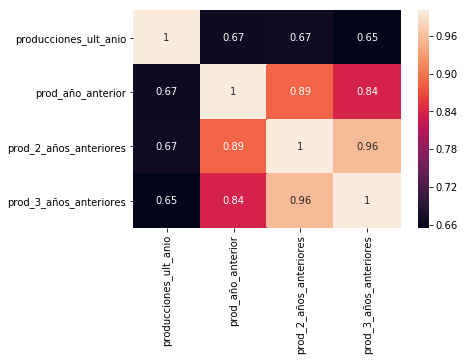

In [89]:
#Se grafica una matriz de correlación y se puede ver una alta correlación entre las producciones de diferentes años
#Esto es porque las producciones de cada año inlcuyen producciones de años anteriores.
sns.heatmap(df[['producciones_ult_anio','prod_año_anterior','prod_2_años_anteriores','prod_3_años_anteriores']].corr(),annot=True)

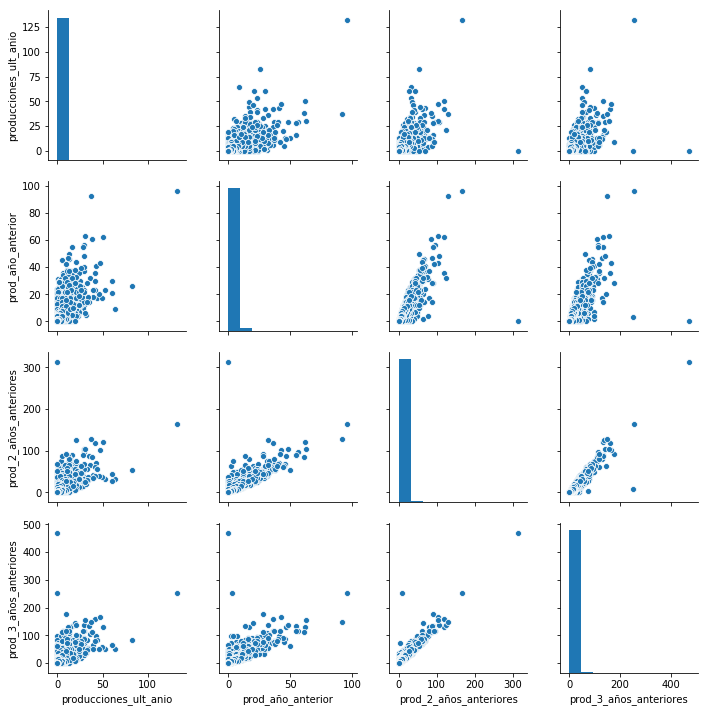

In [90]:
#Se grafica un pairpliot para ver las tendencias
sns.pairplot(df[['producciones_ult_anio','prod_año_anterior','prod_2_años_anteriores','prod_3_años_anteriores']])

In [91]:
df.columns

Index(['sexo', 'producciones_ult_anio', 'prod_año_anterior',
       'prod_2_años_anteriores', 'prod_3_años_anteriores',
       'max_grado_academico', 'gran_area_experticia', 'area_experticia',
       'disciplina_experticia', 'tipo_personal', 'condicion_docente',
       'ded_horaria_docente', 'clase_cargo_docente', 'categoria_conicet',
       'Presento_ultimo_año', 'rango_edad'],
      dtype='object')

In [92]:
#Para disminuir la correlación se le resta a cada año las producciones de los otros años

df[['producciones_ult_anio','prod_año_anterior','prod_2_años_anteriores','prod_3_años_anteriores']]

df['prod_3_años_anteriores']=df['prod_3_años_anteriores']-df['prod_2_años_anteriores']

df['prod_2_años_anteriores']=df['prod_2_años_anteriores']-df['prod_año_anterior']

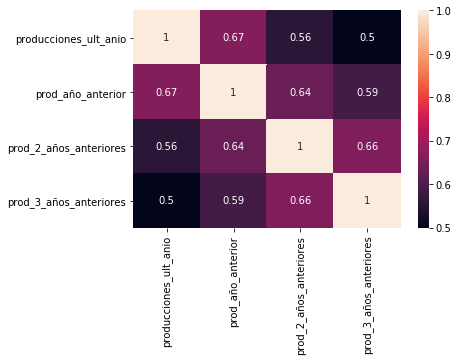

In [93]:
#Se comprueba que haya bajado la correlación
sns.heatmap(df[['producciones_ult_anio','prod_año_anterior','prod_2_años_anteriores','prod_3_años_anteriores']].corr(),annot=True)

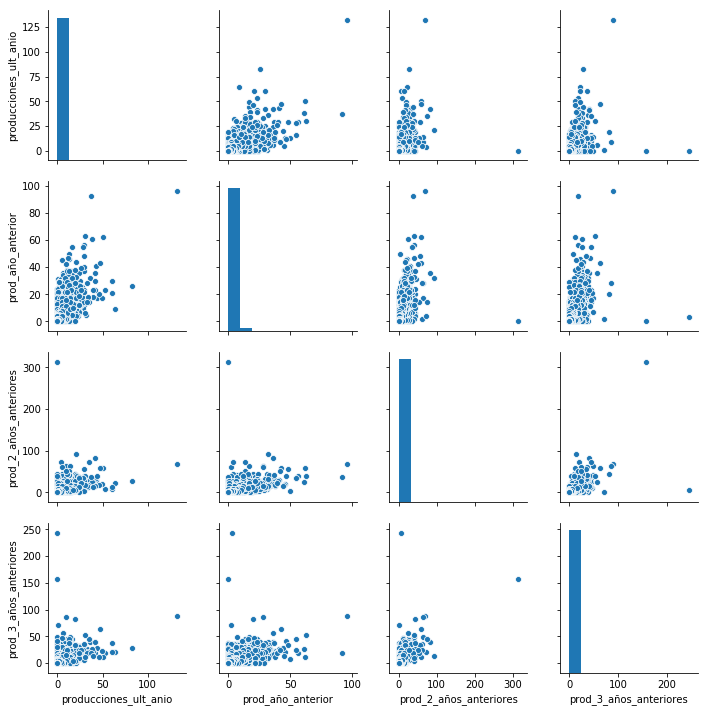

In [94]:
sns.pairplot(df[['producciones_ult_anio','prod_año_anterior','prod_2_años_anteriores','prod_3_años_anteriores']])

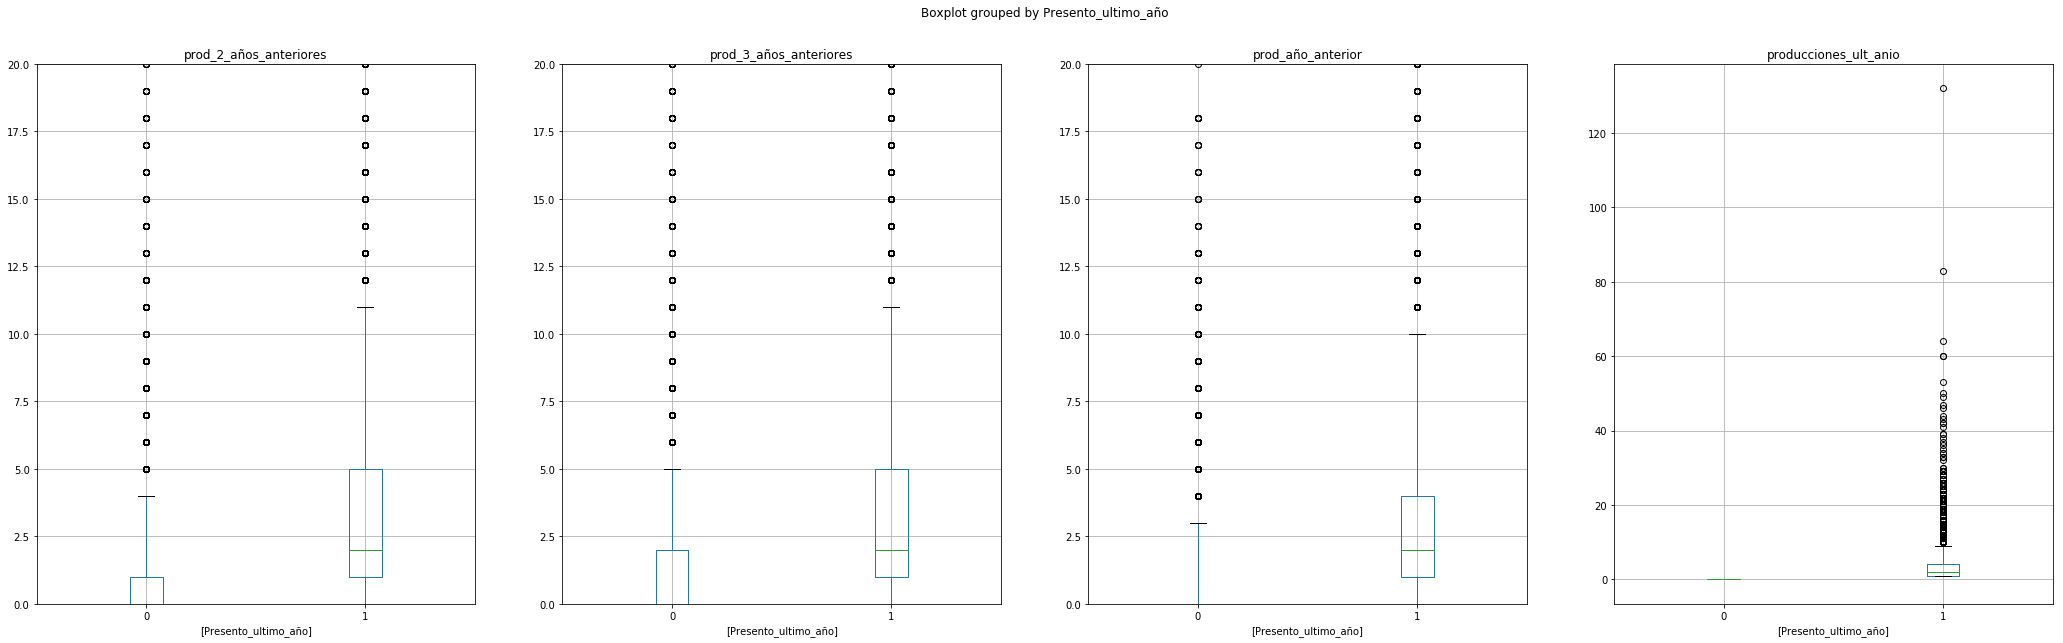

In [95]:
#Se grafican boxplots para ver la importancia de ciertas features
fig, ax_new = plt.subplots(1,4, sharey=False,figsize=(35,10))
axes_ = df.boxplot(by='Presento_ultimo_año',ax=ax_new,return_type='axes',whis=[5,95]);

for ax,col in zip(axes_,['prod_año_anterior','prod_2_años_anteriores','prod_3_años_anteriores']):
    ax.set_ylim(0,20)

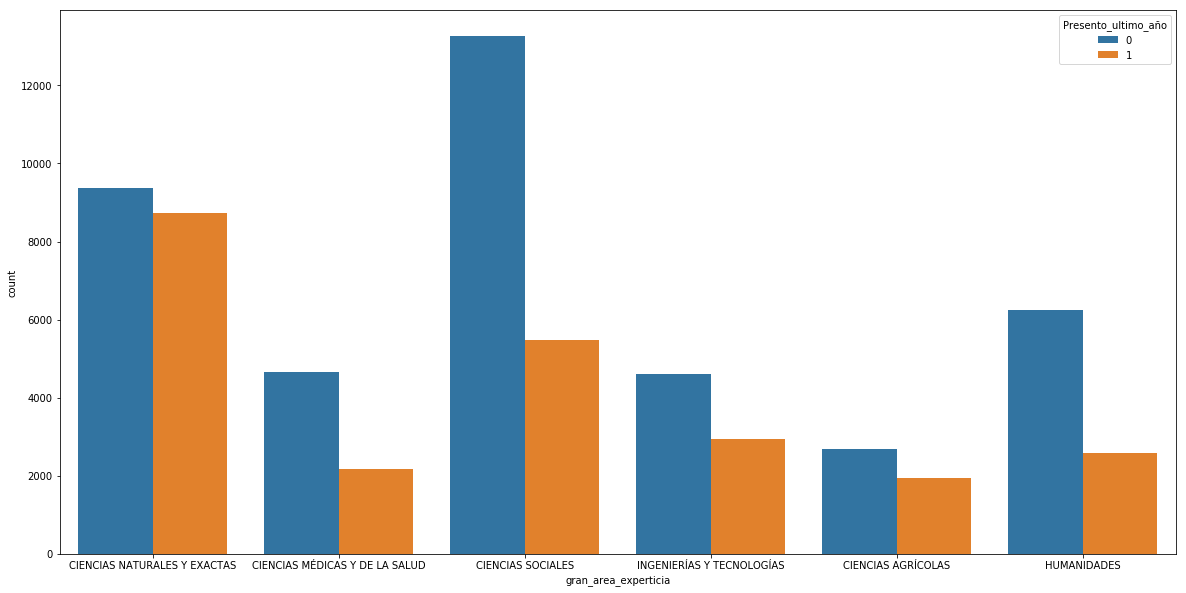

In [109]:
plt.figure(figsize=(20,10))
sns.countplot(df['gran_area_experticia'],hue=df['Presento_ultimo_año'])

In [97]:
df.pivot_table('Presento_ultimo_año',['gran_area_experticia','area_experticia'],margins=True).round(2)

Presento_ultimo_año
gran_area_experticia           area_experticia                                                        
CIENCIAS AGRÍCOLAS             Agricultura, Silvicultura y Pesca                                  0.43
                               Biotecnología Agropecuaria                                         0.55
                               Ciencias Veterinarias                                              0.41
                               Otras Ciencias Agrícolas                                           0.41
                               Producción Animal y Lechería                                       0.33
CIENCIAS MÉDICAS Y DE LA SALUD Biotecnología de la Salud                                          0.58
                               Ciencias de la Salud                                               0.27
                               Medicina Básica                                                    0.54
                               Medicina Clínica                                                   0.19
                               Otras Ciencias Médicas                                             0.21
CIENCIAS NATURALES Y EXACTAS   Ciencias Biológicas                                                0.53
                               Ciencias Físicas                                                   0.48
                               Ciencias Químicas                                                  0.50
                               Ciencias de la Computación e Información                           0.40
                               Ciencias de la Tierra y relacionadas con el Med...                 0.49
                               Matemáticas                                                        0.32
                               Otras Ciencias Naturales y Exactas                                 0.38
CIENCIAS SOCIALES              Ciencia Política                                                   0.34
                               Ciencias de la Educación                                           0.28
                               Comunicación y Medios                                              0.26
                               Derecho                                                            0.29
                               Economía y Negocios                                                0.27
                               Geografía Económica y Social                                       0.34
                               Otras Ciencias Sociales                                            0.29
                               Psicología                                                         0.23
                               Sociología                                                         0.41
HUMANIDADES                    Arte                                                               0.16
                               Filosofía, Ética y Religión                                        0.39
                               Historia y Arqueología                                             0.46
                               Lengua y Literatura                                                0.28
                               Otras Humanidades                                                  0.25
INGENIERÍAS Y TECNOLOGÍAS      Biotecnología Industrial                                           0.58
                               Biotecnología del Medio Ambiente                                   0.58
                               Ingeniería Civil                                                   0.25
                               Ingeniería Eléctrica, Ingeniería Electrónica e ...                 0.33
                               Ingeniería Mecánica                                                0.25
                               Ingeniería Médica                                                  0.33
                               Ingeniería Química                 

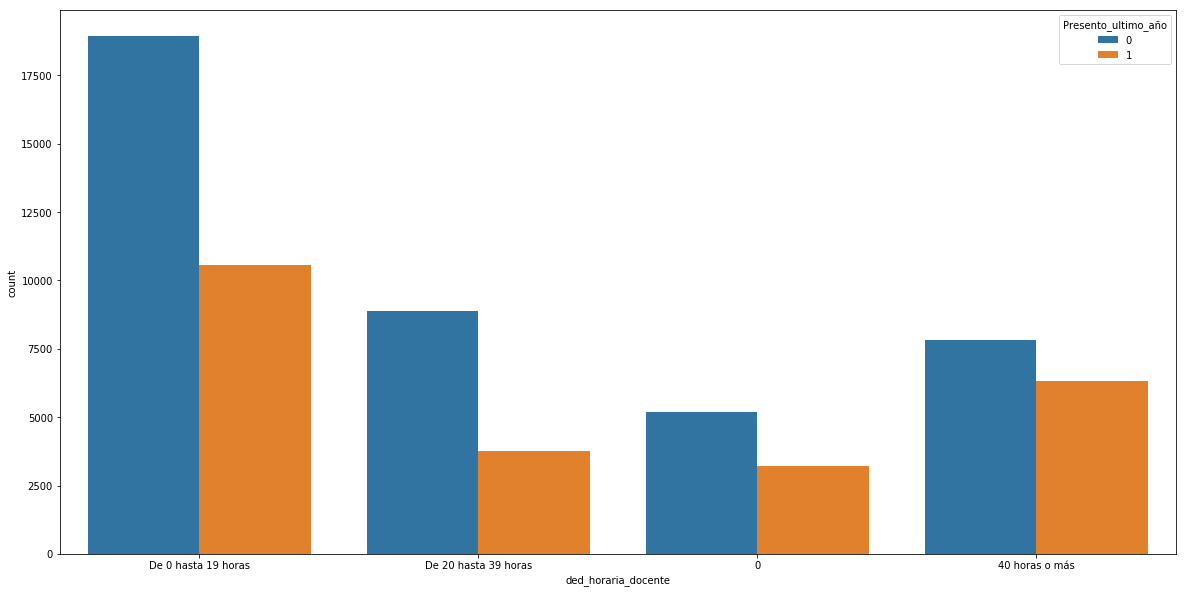

In [98]:
plt.figure(figsize=(20,10))
sns.countplot(df['ded_horaria_docente'],hue=df['Presento_ultimo_año'])

In [99]:
df.pivot_table('Presento_ultimo_año',['tipo_personal','ded_horaria_docente'],margins=True).round(2)

Presento_ultimo_año
tipo_personal                   ded_horaria_docente                      
BECARIO DE I+D                  0                                    0.42
                                40 horas o más                       0.58
                                De 0 hasta 19 horas                  0.53
                                De 20 hasta 39 horas                 0.57
DOCENTE                         40 horas o más                       0.11
                                De 0 hasta 19 horas                  0.12
                                De 20 hasta 39 horas                 0.10
INVESTIGADOR                    0                                    0.56
                                40 horas o más                       0.60
                                De 0 hasta 19 horas                  0.65
                                De 20 hasta 39 horas                 0.50
OTRO PERSONAL DE LA INSTITUCION 0                                    0.14
All                                                                  0.37

In [100]:
#Se aplica undersampling y se guarda el archivo para probar esta opción de balanceo
df2=df[df['Presento_ultimo_año']==0].sample(23849)
df2.shape

(23849, 16)

In [101]:
(df['Presento_ultimo_año']==0).value_counts()

True     40814
False    23849
Name: Presento_ultimo_año, dtype: int64

In [102]:
df3=df[df['Presento_ultimo_año']==1]
df3.shape

(23849, 16)

In [103]:
df_undersampling=pd.concat([df2,df3])

In [104]:
df_undersampling.head()

,sexo,producciones_ult_anio,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,max_grado_academico,gran_area_experticia,area_experticia,disciplina_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,Presento_ultimo_año,rango_edad
43883,F,0,0,1,1,Universitario de grado,HUMANIDADES,Lengua y Literatura,Estudios Generales de Literatura,DOCENTE,Interino,De 0 hasta 19 horas,Jefe de trabajos prácticos,No pertenece a Conicet,0,"(20, 30]"
6110,F,0,0,0,1,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,Ciencias Químicas,Química Orgánica,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Ayudante Docente A,No pertenece a Conicet,0,"(30, 40]"
63203,F,0,0,0,0,Universitario de grado,CIENCIAS SOCIALES,Psicología,Otras Psicología,OTRO PERSONAL DE LA INSTITUCION,no docente,0,no docente,No pertenece a Conicet,0,"(60, 70]"
62019,M,0,0,0,0,Universitario de grado,INGENIERÍAS Y TECNOLOGÍAS,Ingeniería de los Materiales,Recubrimientos y Películas,BECARIO DE I+D,Interino,De 0 hasta 19 horas,Ayudante de trabajos prácticos de primera,No pertenece a Conicet,0,"(30, 40]"
3481,F,0,1,7,4,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Físicas,Otras Ciencias Físicas,INVESTIGADOR,Regular o por concurso,40 horas o más,Profesor asociado,Investigador independiente,0,"(40, 50]"


In [105]:
df_undersampling.shape

(47698, 16)

In [106]:
df_undersampling['Presento_ultimo_año'].value_counts()

1    23849
0    23849
Name: Presento_ultimo_año, dtype: int64

In [107]:
df_undersampling.to_csv('Df_CyT_us.csv')

In [108]:
#Se guarda el archivo desbalanceado para aplicarle oversampling (SMOTE)
df.to_csv('Df_CyT_1.csv')